# Hashtags study

## Import

In [1]:
import pandas as pd
import json
import numpy as np
from itertools import repeat

from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

from concurrent.futures import wait as futures_wait
from concurrent.futures.process import ProcessPoolExecutor

import importlib
import sys
sys.path.insert(0, '../3_Hashtag_study')
import hashtag_util as ut
sys.path.insert(0, '../')
import general_utils as gen_ut

## Dataset preparation

In [2]:
df = pd.read_csv('../tweets.csv',low_memory=False,
                 usecols=['user_screen_name','hashtags'])

In [3]:
df_novax = pd.read_csv('tweets_novax_100.csv',low_memory=False,usecols=['user_screen_name','hashtags'])
df_provax = pd.read_csv('tweets_provax_100.csv',low_memory=False,usecols=['user_screen_name','hashtags'])

In [4]:
#Creating a map of all hashtags with the number of uses
listHashtags = []

for s in df['hashtags']:    
    [ listHashtags.append(x) for x in gen_ut.get_string_json(s,'text') ]
    
dfHashtags_total = pd.DataFrame()
dfHashtags_total['hashtags'] = listHashtags
dfHashtags_total['count_total'] = 0

dfHashtags_total = dfHashtags_total.groupby('hashtags').count()
dfHashtags_total.sort_values(['count_total'],axis = 0,inplace=True,ascending=False)

dfHashtags_total

,count_total
hashtags,
vaccino,142684
vaccini,105989
COVID19,74834
AstraZeneca,56306
coronavirus,39407
...,...
Leishmaniosi,1
detta,1
Leipzig,1


In [5]:
#Creating a map of all hashtags used by the benignant users
listHashtags_provax = []

for s in df_provax['hashtags']:    
    [ listHashtags_provax.append(x) for x in gen_ut.get_string_json(s,'text') ]
    
dfHashtags_provax = pd.DataFrame()
dfHashtags_provax['hashtags'] = listHashtags_provax
dfHashtags_provax['count_provax'] = 0

dfHashtags_provax = dfHashtags_provax.groupby('hashtags').count()
dfHashtags_provax.sort_values(['count_provax'],axis = 0,inplace=True,ascending=False)

dfHashtags_provax

,count_provax
hashtags,
vaccino,4797
vaccini,3937
COVID19,2403
AstraZeneca,2055
Covid,2000
...,...
Schio,1
Schwarzer,1
Sciascia100,1


In [6]:
#Creating a map of all hashtags used by the malicius users
listHashtags_novax = []

for s in df_novax['hashtags']:    
    [ listHashtags_novax.append(x) for x in gen_ut.get_string_json(s,'text') ]
    
dfHashtags_novax = pd.DataFrame()
dfHashtags_novax['hashtags'] = listHashtags_novax
dfHashtags_novax['count_novax'] = 0

dfHashtags_novax = dfHashtags_novax.groupby('hashtags').count()
dfHashtags_novax.sort_values(['count_novax'],axis = 0,inplace=True,ascending=False)

dfHashtags_novax

,count_novax
hashtags,
vaccino,11731
vaccini,7840
COVID19,6083
vaccinoCovid,4173
Covid19,3853
...,...
esempremezzogiorno,1
MalaSanità,1
esperimentigenetici,1


## Difference between the two sets of hashtag

In [7]:
dfHashtags = pd.concat([dfHashtags_novax,dfHashtags_provax], axis=1)
dfHashtags.fillna(0,inplace=True)

dfHashtags['count_total'] = dfHashtags['count_novax'] + dfHashtags['count_provax']
dfHashtags.sort_values(by=['count_total'],inplace=True,ascending=False)

dfHashtags

,count_novax,count_provax,count_total
hashtags,,,
vaccino,11731.0,4797.0,16528.0
vaccini,7840.0,3937.0,11777.0
COVID19,6083.0,2403.0,8486.0
AstraZeneca,3842.0,2055.0,5897.0
vaccinoCovid,4173.0,786.0,4959.0
...,...,...,...
abbracciauninglese,1.0,0.0,1.0
adverseReaction,1.0,0.0,1.0
adottabile,1.0,0.0,1.0


In [8]:
#Get all hashtag used only by novax
dfHashatg_onlyNovax = dfHashtags[dfHashtags['count_provax']==0].copy()
dfHashatg_onlyNovax.drop(columns=['count_novax','count_provax'],inplace=True)
dfHashatg_onlyNovax.rename(columns={"count_total": "count"},inplace=True)
dfHashatg_onlyNovax

,count
hashtags,
DittaturaSanitaria,430.0
Mantova,369.0
iononmivaccino,360.0
TSO,237.0
mainstream,205.0
...,...
RegioneCampania,1.0
abbracciauninglese,1.0
adverseReaction,1.0


In [9]:
#Get all hashtag used only by novax
dfHashatg_onlyProvax = dfHashtags[dfHashtags['count_novax']==0].copy()
dfHashatg_onlyProvax.drop(columns=['count_novax','count_provax'],inplace=True)
dfHashatg_onlyProvax.rename(columns={"count_total": "count"},inplace=True)
dfHashatg_onlyProvax

,count
hashtags,
IoSeguoTgr,361.0
Tg2Rai,214.0
nonstopnews,114.0
ioseguoTgr,99.0
Gr1,90.0
...,...
tiktok,1.0
thierrybreton,1.0
thanksgiving,1.0


## Grafical visualization

### Provax account

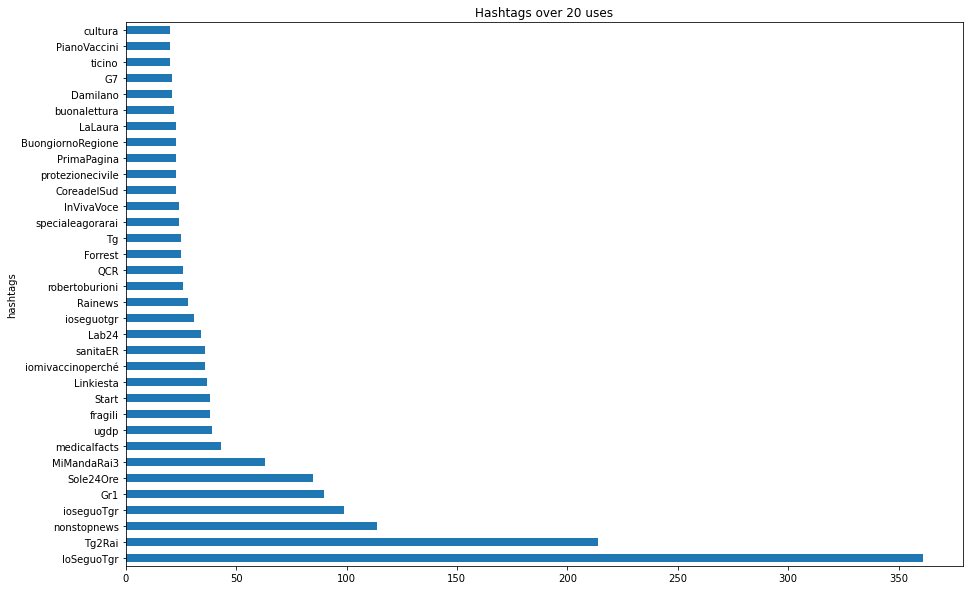

In [10]:
ut.visual_histogram(dfHashatg_onlyProvax,20)

### Novax account

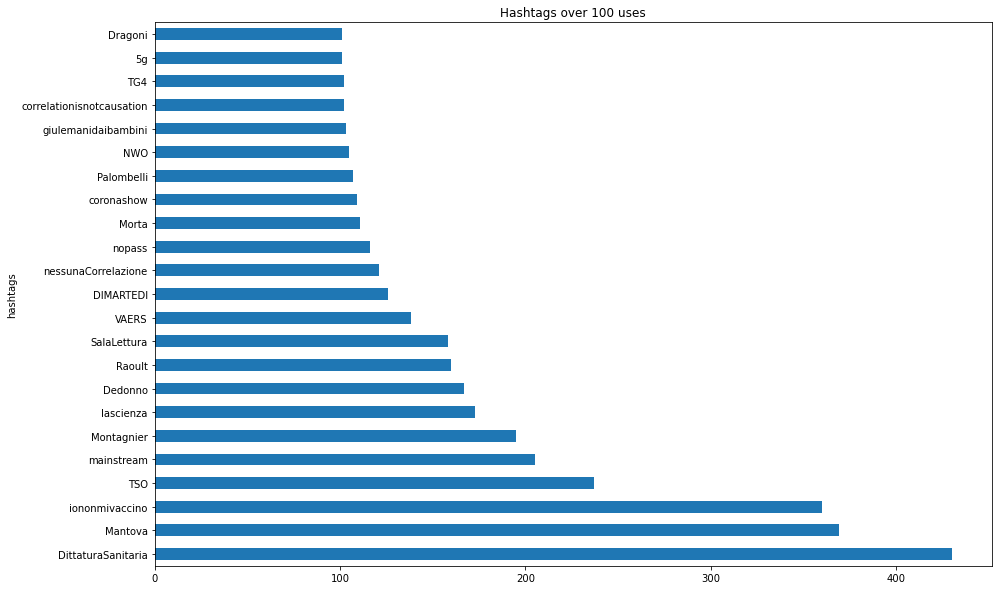

In [12]:
ut.visual_histogram(dfHashatg_onlyNovax,100)